In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import os
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('final_df_ml.csv')

### Deleted the 'drunken driving deaths column'

In [3]:
dataset.drop(['Alcohol-impaired driving deaths Value'],axis=1,inplace=True)

### The predictors and labels for modelling 

In [4]:
dataset.head()

,Unnamed: 0,avg_income_n2_agi,Premature death Value,Poor or fair health Value,Poor physical health days Value,Poor mental health days Value,Low birthweight Value,Adult smoking Value,Adult obesity Value,Food environment index Value,Physical inactivity Value,Access to exercise opportunities Value,Excessive drinking Value,Sexually transmitted infections Value,Teen births Value,Diabetic screening Value,Premature age-adjusted mortality Value,Frequent physical distress Value,Frequent mental distress Value,Diabetes Value
0,0,16.430620,9215.0,0.194,4.4,4.3,0.09,0.187,0.309,7.1,0.287,0.708,0.151,416.1,35.2,0.84,456.4,0.1,0.1,0.109
1,1,31.412955,7455.0,0.160,4.1,4.2,0.09,0.186,0.267,7.6,0.252,0.722,0.151,308.2,41.6,0.84,356.0,0.1,0.1,0.109
2,2,18.287601,8500.0,0.257,4.9,4.7,0.12,0.214,0.408,5.1,0.329,0.453,0.124,632.3,67.9,0.90,430.8,0.2,0.1,0.153
3,3,26.999781,11008.0,0.220,4.8,4.6,0.12,0.210,0.401,7.4,0.332,0.328,0.138,367.3,48.4,0.84,541.7,0.1,0.1,0.125
4,4,22.035900,8656.0,0.207,4.6,4.5,0.07,0.194,0.324,8.3,0.285,0.255,0.141,159.1,45.3,0.86,430.3,0.1,0.1,0.117


In [5]:
dataset.drop(['Unnamed: 0'],axis = 1,inplace=True)

In [6]:
Data_X = np.array(dataset.iloc[:,1:])
Data_Y = np.array(dataset.iloc[:,:1])

## 1. Linear Regression

In this section, we have used Linear Regression to fit the model and used r2 score to evaluate the performance of the model. Since in a vanilla linear regression, there is no parameters to worry about, we go for cross validation by splitting up the data in 10 parts. In each iteration, we fit the model on the 9 parts of data and validate it on the 1 left out part. To get a general idea of how well the model is performing we take the mean of the r2 scores from all the iterations. (mean_r2 = 0.4947) 

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,make_scorer


In [8]:
lr = LinearRegression()
cross_val_score(lr,Data_X,Data_Y,cv = 10,scoring=make_scorer(r2_score)).mean()

0.49576165650105414

 The average of the mean_squared error for linear regression model is found to be 35.25

In [9]:
cross_val_score(lr,Data_X,Data_Y,cv = 10,scoring=make_scorer(mean_squared_error)).mean()

35.25255164147558

In [10]:
from sklearn.linear_model import Lasso

#### LASSO

LASSO is a regularisation technique used in Linear Regression, to cut out the number of predictors in case it overfits. The alpha value is inversely proportional to the number of predictors it is going to cut down. We tried alpha value 0.001,0.01,0.1,1,10. When the alpha values were increase the r2 score of the model reduced. Maximum r2 score was achieved with alpha = 0

In [11]:
las = Lasso(alpha = 0.001)

cross_val_score(las,Data_X,Data_Y,cv = 10,scoring=make_scorer(r2_score)).mean()

0.49779327337638224

In [12]:
las = Lasso(alpha = 0.01)

cross_val_score(las,Data_X,Data_Y,cv = 10,scoring=make_scorer(r2_score)).mean()

0.49083986404196195

In [13]:
las = Lasso(alpha = 0.1)

cross_val_score(las,Data_X,Data_Y,cv = 10,scoring=make_scorer(r2_score)).mean()

0.4312578922098699

In [14]:
las = Lasso(alpha = 1)

cross_val_score(las,Data_X,Data_Y,cv = 10,scoring=make_scorer(r2_score)).mean()

0.36610139026179117

## 2. Random Forest 


To find the importance of predictors we go for Random Forest. 

In [15]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

RF.fit(Data_X,Data_Y)
Rf_pred = RF.predict(Data_X)
feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = dataset.columns[1:],
                                    columns=['importance']).sort_values('importance',ascending=False)


/home/amrita95/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


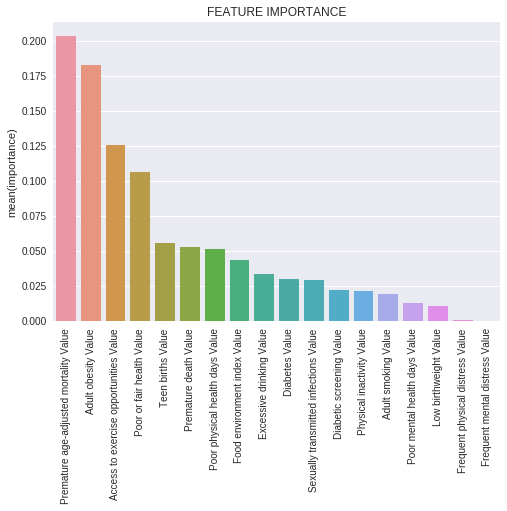

In [16]:
import seaborn as sns
barplot = sns.barplot(x = feature_importances.index, y = "importance", data = feature_importances)
barplot.set_xticklabels(feature_importances.index,rotation = 90)
barplot.set_title("FEATURE IMPORTANCE")
plt.show()

## 3. SVM Regressor

Tried out SVM Regressor with linea

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = SVR(kernel = 'linear')
cross_val_score(svc,Data_X,Data_Y,cv = 10,scoring=make_scorer(r2_score)).mean()
#clf = GridSearchCV(svc, parameters, cv=5)
#clf.fit(Data_X, Data_Y)

/home/amrita95/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 3. KNN Regressor

The parameter 'n_neighbor' is varied from 5-100. The r2 score of the regressor got saturated at n_neighbours ~30 at a value 0.303. Linear Regression without Lasso gave us the best result so far.

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
neigh = KNeighborsRegressor(n_neighbors=50)

In [53]:
cross_val_score(neigh,Data_X,Data_Y,cv = 10,scoring=make_scorer(r2_score)).mean()

0.3034568283944771